# setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import pickle
from typing import Sequence
from tempfile import mkdtemp

import pandas as pd

from sklearn.pipeline import Pipeline

from src.io import CsvDataLoader
from src.preproc import RawDataCleaner, TextCleaner, SimpleTokenizer

pd.set_option('display.max_rows', 100)

# load raw data & preprocess

In [114]:
pipe = Pipeline([
    ('load_data', CsvDataLoader(file_name='polish_sentiment_dataset.csv')),
    ('basic_cleaning', RawDataCleaner()),
    ('text_cleaning', TextCleaner()),
    ('tokenizer', SimpleTokenizer())
], memory=mkdtemp())

In [250]:
data = pipe.fit_transform(None)

/home/mic/Pulpit/pyProj/gensim/venv/lib/python3.8/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 2.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/mic/Pulpit/pyProj/gensim/venv/lib/python3.8/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 2.30s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they

In [ ]:
with open('./data/data_preproc.pkl', 'wb') as f:
    pickle.dump(data, f)

# basic eda

In [140]:
data.shape

(917525, 8)

In [141]:
data['negative'].value_counts(dropna=False)/len(data)

0.0    0.800228
1.0    0.199772
Name: negative, dtype: float64

<AxesSubplot:ylabel='Frequency'>

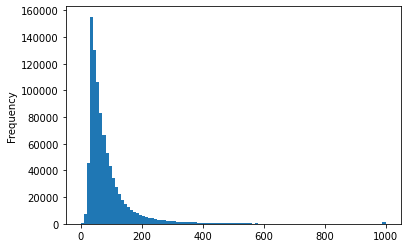

In [58]:
data['len'].clip(upper=1000).plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

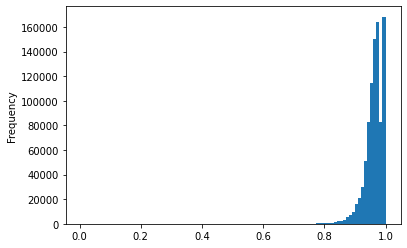

In [61]:
data['len_clean_ratio'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

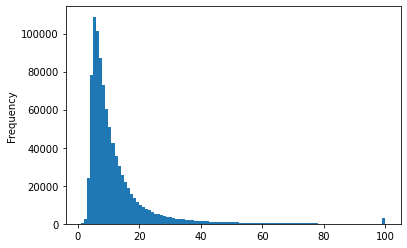

In [219]:
data['tokens_len'].clip(upper=100).plot.hist(bins=100)

## token length

In [ ]:
tokens_len = [(i, len(tok)) for i, toks in enumerate(data['tokens']) for tok in toks]
tokens_len = pd.DataFrame(tokens_len, columns=['row', 'tok_len'])

In [286]:
print(f"words in data: {len(tokens_len)}")

words in data: 12083288


<AxesSubplot:ylabel='Frequency'>

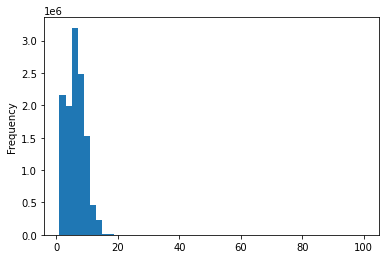

In [256]:
tokens_len['tok_len'].clip(upper=100).plot.hist(bins=50)

In [257]:
tokens_len['tok_len'].describe()

count    1.208329e+07
mean     5.755617e+00
std      4.244786e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      9.982000e+03
Name: tok_len, dtype: float64

In [258]:
max(tokens_len['tok_len'])

9982

In [271]:
tokens_len[tokens_len['tok_len']==50]

,row,tok_len
9940205,774921,50
10279304,812174,50
11840864,907920,50


In [261]:
data.index

RangeIndex(start=0, stop=917525, step=1)

In [274]:
data['desc_clean'][774921]

'xdxdxdxdxdxxxxxxxxxxxxxddddddddddddddxxxxxxxxxddxx'

# adhoc eda

In [275]:
data

,desc,len,negative,desc_clean,len_clean,len_clean_ratio,tokens,tokens_len
0,Polecam nie pierwszy i nie ostatni raz!,39,0.0,polecam nie pierwszy i nie ostatni raz,38,0.974359,"[polecam, nie, pierwszy, i, nie, ostatni, raz]",7
1,Bardzo dobra komunikacja sms i telefoniczna. Z...,121,0.0,bardzo dobra komunikacja sms i telefoniczna za...,117,0.966942,"[bardzo, dobra, komunikacja, sms, i, telefonic...",16
2,Polecam zakupy w tym sklepie. Są dostępne częś...,87,0.0,polecam zakupy w tym sklepie są dostępne częśc...,84,0.965517,"[polecam, zakupy, w, tym, sklepie, są, dostępn...",14
3,Jestem w pełni zadowolona z przebiegu transakcji,48,0.0,jestem w pełni zadowolona z przebiegu transakcji,48,1.000000,"[jestem, w, pełni, zadowolona, z, przebiegu, t...",7
4,Transakcja przebiegła błyskawicznie. Pełen pro...,86,0.0,transakcja przebiegła błyskawicznie pełen prof...,84,0.976744,"[transakcja, przebiegła, błyskawicznie, pełen,...",9
...,...,...,...,...,...,...,...,...
917520,Coraz lepiej wygląda,20,1.0,coraz lepiej wygląda,20,1.000000,"[coraz, lepiej, wygląda]",3
917521,JA SRAM NA TEN PIERSCIONEK I NA CIEBIE CHWILE ...,89,1.0,ja sram na ten pierscionek i na ciebie chwile ...,89,1.000000,"[ja, sram, na, ten, pierscionek, i, na, ciebie...",17
917522,Rafatus do Marleny Ty kurwo bez honoru ...,126,1.0,rafatus do marleny ty kurwo bez honoru kto tu ...,91,0.722222,"[rafatus, do, marleny, ty, kurwo, bez, honoru,...",16
917523,matka Marleny prosi o pomoc,29,1.0,matka marleny prosi o pomoc,27,0.931034,"[matka, marleny, prosi, o, pomoc]",5


## lettes dict

In [8]:
from collections import Counter

def count_chars(s, chars):
    counter = Counter(s)
    return {c : counter.get(c,0) for c in chars}

letters_dict = Counter([c for s in data['desc'] for c in s])

In [9]:
sorted(letters_dict.items(), key=lambda i: i[1], reverse=True)

[(' ', 11269150),
 ('a', 6918402),
 ('e', 5827493),
 ('o', 5432923),
 ('i', 4519406),
 ('z', 4060100),
 ('n', 3448487),
 ('s', 3133460),
 ('r', 2971734),
 ('k', 2774425),
 ('y', 2761594),
 ('w', 2572928),
 ('t', 2412194),
 ('p', 2306489),
 ('m', 2204999),
 ('c', 2117288),
 ('d', 2068713),
 ('l', 1826311),
 ('b', 1633695),
 ('u', 1422661),
 ('j', 1374134),
 ('.', 1076430),
 ('ł', 1008407),
 (',', 807210),
 ('g', 713406),
 ('ó', 465146),
 ('ę', 448375),
 ('ż', 416814),
 ('P', 367068),
 ('ą', 360837),
 ('h', 338778),
 ('S', 288760),
 ('!', 278291),
 ('ś', 273548),
 ('f', 228596),
 ('\r', 219740),
 ('ć', 212443),
 ('B', 174693),
 ('A', 170350),
 ('W', 166578),
 ('O', 155386),
 ('D', 154107),
 ('T', 147638),
 ('Z', 133755),
 ('J', 133418),
 ('E', 132228),
 ('N', 122486),
 ('K', 104327),
 ('\n', 104190),
 ('M', 102931),
 (')', 99456),
 ('C', 95883),
 ('I', 91000),
 ('-', 84443),
 ('0', 83453),
 ('R', 82176),
 (':', 75159),
 ('L', 61472),
 ('ń', 60901),
 ('1', 58551),
 ('G', 48068),
 ('Y', 40

In [ ]:
# todo: \r, \n, \xa0 to space

## filter alpha num and punctuation

In [22]:
a = '257 najlepszy moment ψψ'
b = 'اغلاق الكلبة العربي يمارس الجنس مع ما يصل'
c = "stara ''sowiecka szkola'' zaczynam sie zastanawiac czy mozna by ich legalnie zdelegalizowac ?"
d = 'Dobrze. Szkoda, że InPost nie precyzuje co oznacza, że dostarcza przesyłkę "OD RANA"'
e = '  asd  asd  '
f = 'łączńie ćma grzegżźółka'
g = 'Bardzo przyjazny klientom sklep. \\Realizuje, wszystkie zamówienai: takie - takie '
h = 'Szanowni Państwo, ODRADZAM !!!\r\r\r\n\r\r\r\n'
i = 'Szanowni Państwo,\r\r\r\n\r\r\r\n ODRADZAM !!!'
j = 'what???????!!!!!!!!!'

tt = [a,b,c,d,e,f,g,h,i,j]

In [25]:


for s in tt:
    c = re.sub(special, ' ', s)
    c = re.sub(alpha, '', c)
    c = re.sub('\s+', ' ', c)
    c = c.strip()
    print(f"len: {len(c)}|{c}|")

len: 20|257 najlepszy moment|
len: 0||
len: 93|stara ''sowiecka szkola'' zaczynam sie zastanawiac czy mozna by ich legalnie zdelegalizowac ?|
len: 84|Dobrze. Szkoda, że InPost nie precyzuje co oznacza, że dostarcza przesyłkę "OD RANA"|
len: 7|asd asd|
len: 23|łączńie ćma grzegżźółka|
len: 78|Bardzo przyjazny klientom sklep. Realizuje, wszystkie zamówienai takie - takie|
len: 30|Szanowni Państwo, ODRADZAM !!!|
len: 30|Szanowni Państwo, ODRADZAM !!!|
len: 20|what???????!!!!!!!!!|


# modeling

## creating dictionaty

In [289]:
import gensim
from gensim import corpora, models

In [276]:
# Create dictionary
dictionary = corpora.Dictionary(data['tokens'])

In [319]:
print(f"unique tokens count: {len(dictionary)}")

unique tokens count: 260521


In [287]:
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]
tfidf = models.TfidfModel(corpus, smartirs='ntc')

In [294]:
corpus[0]

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]

In [310]:
tfidf[corpus][0]

[(0, 0.11502465340007656),
 (1, 0.4447199823065697),
 (2, 0.6162766796694312),
 (3, 0.49247428983038594),
 (4, 0.11888695562762791),
 (5, 0.3905527956380666)]

In [315]:
[(dictionary[tok_id], tok_freq) for tok_id, tok_freq in tfidf[corpus][0]]

[('i', 0.11502465340007656),
 ('nie', 0.4447199823065697),
 ('ostatni', 0.6162766796694312),
 ('pierwszy', 0.49247428983038594),
 ('polecam', 0.11888695562762791),
 ('raz', 0.3905527956380666)]

In [316]:
[(dictionary[tok_id], tok_freq) for tok_id, tok_freq in tfidf[corpus][1]]

[('i', 0.060944159953105696),
 ('polecam', 0.06299054529559758),
 ('bardzo', 0.08280210917801677),
 ('dobra', 0.20322288487180415),
 ('dobrze', 0.19508840777884015),
 ('komunikacja', 0.3317832424818046),
 ('sklep', 0.11649578839171103),
 ('sms', 0.3497153161337092),
 ('telefoniczna', 0.39583410968622923),
 ('ten', 0.20909075076732328),
 ('terminie', 0.3069124397146287),
 ('towar', 0.1416645550082417),
 ('w', 0.07953541854259781),
 ('wysłany', 0.3676203764967229),
 ('zabezpieczony', 0.3259806243987228),
 ('zamówiony', 0.31264824437629013)]

## w2v

In [3]:
with open('./data/data_preproc.pkl', 'rb') as f:
    data = pickle.load(f)

In [5]:
model

In [4]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=data['tokens'], vector_size=25, window=5, min_count=1, workers=4)
model.save("./models/word2vec.model")

FileNotFoundError: [Errno 2] No such file or directory: './models/word2vec.model'

In [6]:
from datetime import datetime

In [7]:
dateTimeObj = datetime.now()

In [8]:
print(dateTimeObj)

2021-10-25 23:07:27.035741


In [10]:
timestampStr = dateTimeObj.strftime("%Y%m%d_%H%M%S")
print(timestampStr)

20211025_230727


In [ ]:
datasets = pd.DataFrame(columns=['id', 'ts', 'params', 'git_branch', 'git_commit', 'shape', 'columns'])

In [128]:
import os

os.mkdir('./data/test')

,a,b
0,1,2


In [138]:
aa = pd.DataFrame(columns=['c', 'd'])
aa.append(pd.Series((1,2)).to_frame().T)


,c,d,0,1
0,NaN,NaN,1.0,2.0


'./data/er'

In [131]:
os.path.exists('./data')

True